# Kernel SAX for ETT hourly dataset

In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from tqts.quantizer.kernel_sax import KernelSAX
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 6)


DATA_DIR = "./data/"
IMG_DIR = "./images/"

### Preprocessing functions

In [2]:
def load_dataset(file_path: str) -> pd.DataFrame:
    return pd.read_csv(file_path, index_col=0, parse_dates=True)

In [3]:
def test_stationarity(timeseries: pd.Series) -> bool:
    """
    Perform Augmented Dickey-Fuller test to check stationarity.
    """
    result = adfuller(timeseries, autolag='AIC')
    adf_statistic = result[0]
    p_value = result[1]
    print('Obtained p-value: {:.2f}'.format(p_value))
    if p_value <= 0.05:
        print('Series is stationary')
    else:
        print('Series in non-stationary')
    return p_value <= 0.05  # Stationary if p-value is small

In [4]:
def make_stationary(timeseries: pd.Series) -> pd.Series:
    """
    Apply differencing to make the time series stationary.
    """
    return timeseries.diff().dropna()

In [5]:
def process_time_series(file_path: str, col: str) -> pd.Series:
    """
    Main function to process the time series data.
    """
    # Load data
    data = load_dataset(file_path)
    timeseries = data[col]

    # Check stationarity
    if test_stationarity(timeseries):
        print("Time series is already stationary.")
        return timeseries
    else:
        print("Time series is not stationary. Making it stationary...")
        stationary_series = make_stationary(timeseries)
        return stationary_series

In [6]:
data = process_time_series(DATA_DIR+"ETT-small/ETTh1.csv", col='OT')
data.head()

Obtained p-value: 0.01
Series is stationary
Time series is already stationary.


date
2016-07-01 00:00:00    30.531000
2016-07-01 01:00:00    27.787001
2016-07-01 02:00:00    27.787001
2016-07-01 03:00:00    25.044001
2016-07-01 04:00:00    21.948000
Name: OT, dtype: float64

<Axes: xlabel='date'>

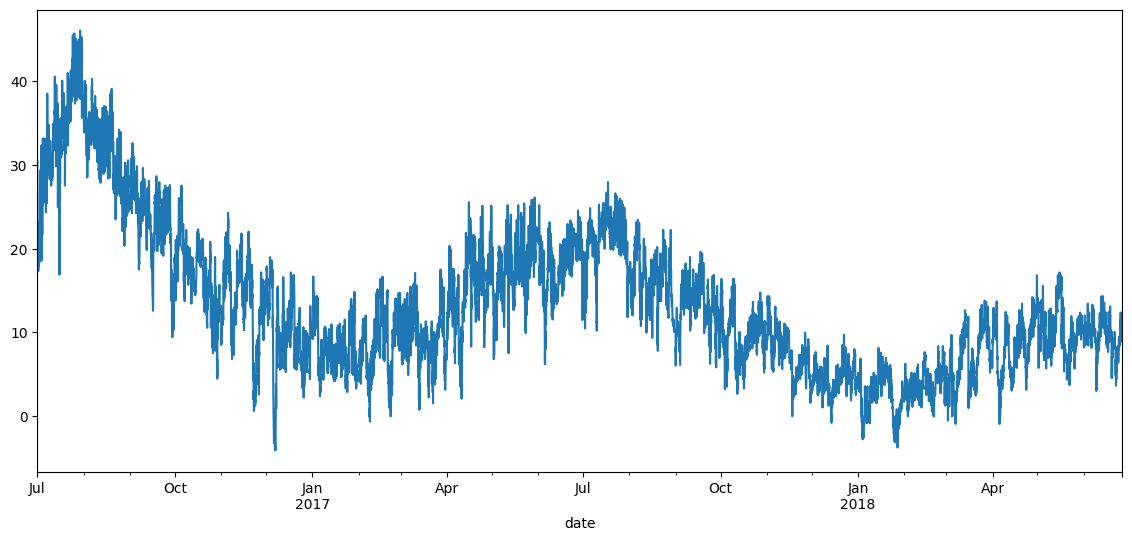

In [7]:
data.plot()

In [25]:
decompose = sm.tsa.seasonal_decompose(data, model='additive', period=52)
trend = decompose.trend
seasonal = decompose.seasonal
trend = trend.fillna(method='ffill')
trend = trend.fillna(method='bfill')
seasonal = seasonal.fillna(method='ffill')
seasonal = seasonal.fillna(method='bfill')

/var/folders/hw/c3fmf0kj7jz9my8t1s68xlf00000gn/T/ipykernel_94040/1904705841.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  trend = trend.fillna(method='ffill')
/var/folders/hw/c3fmf0kj7jz9my8t1s68xlf00000gn/T/ipykernel_94040/1904705841.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  trend = trend.fillna(method='bfill')
/var/folders/hw/c3fmf0kj7jz9my8t1s68xlf00000gn/T/ipykernel_94040/1904705841.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  seasonal = seasonal.fillna(method='ffill')
/var/folders/hw/c3fmf0kj7jz9my8t1s68xlf00000gn/T/ipykernel_94040/1904705841.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  seasonal = seas

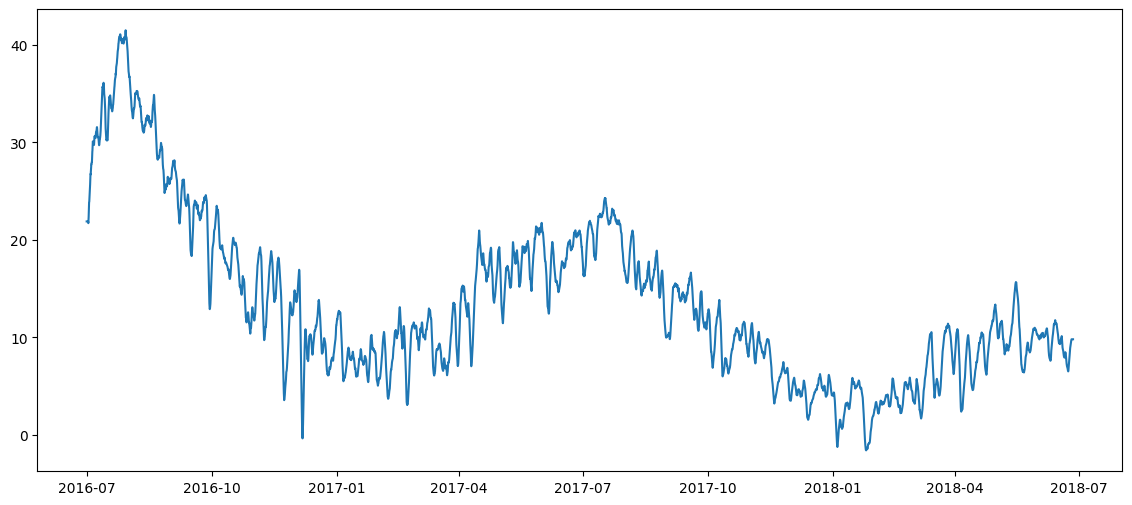

In [26]:
plt.plot(trend)

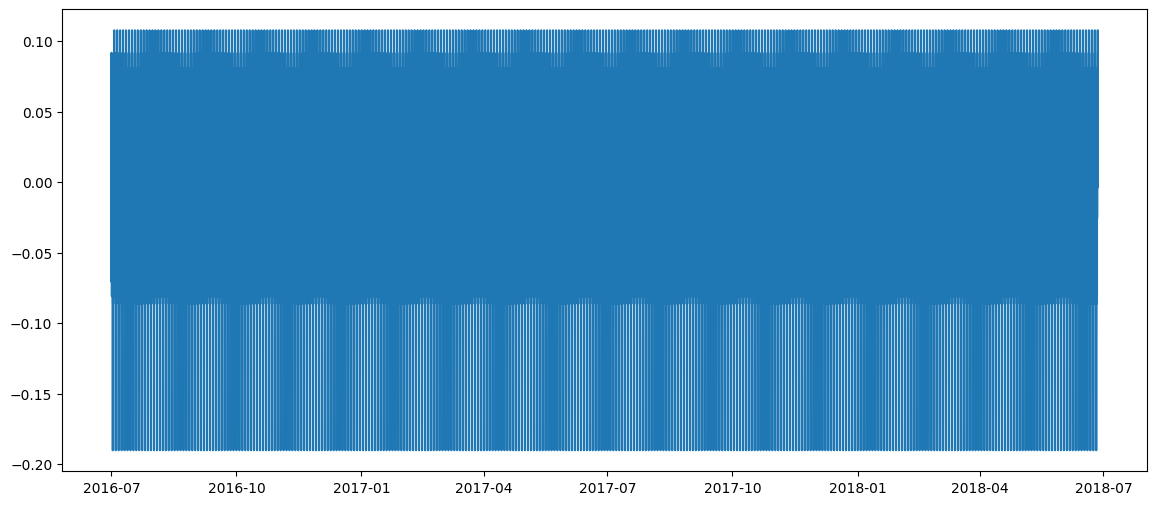

In [27]:
plt.plot(seasonal)

### Kernel SAX on Original Series

/Users/dhanunjayelluri/Desktop/Data_Science_2021/Thesis/master-thesis/src/tqts/quantizer/lloyd_max.py:125: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  numerator = integrate.quad(
/Users/dhanunjayelluri/Desktop/Data_Science_2021/Thesis/master-thesis/src/tqts/quantizer/lloyd_max.py:128: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) o

Epoch 1, Boundaries delta: 18.2837127738, Codewords delta: 7.5500778253
Epoch 2, Boundaries delta: 3.0486678512, Codewords delta: 1.8362784812
Epoch 3, Boundaries delta: 1.2935403063, Codewords delta: 1.0634757633
Epoch 4, Boundaries delta: 0.8599417181, Codewords delta: 0.6923300088
Epoch 5, Boundaries delta: 0.5975423648, Codewords delta: 0.4994116543
Epoch 6, Boundaries delta: 0.4373475409, Codewords delta: 0.3935680957


/Users/dhanunjayelluri/Desktop/Data_Science_2021/Thesis/master-thesis/src/tqts/quantizer/lloyd_max.py:128: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  denominator = integrate.quad(self.density_func, bi, bi_plus_1)[0]


Epoch 7, Boundaries delta: 0.3556101986, Codewords delta: 0.3240017428
Epoch 8, Boundaries delta: 0.2994085669, Codewords delta: 0.2869423532
Epoch 9, Boundaries delta: 0.2669222263, Codewords delta: 0.2627504632
Epoch 10, Boundaries delta: 0.2427928606, Codewords delta: 0.2241909027
Epoch 11, Boundaries delta: 0.2066536902, Codewords delta: 0.1811329918
Epoch 12, Boundaries delta: 0.1709643669, Codewords delta: 0.1600155681
Epoch 13, Boundaries delta: 0.1518593674, Codewords delta: 0.1384987747
Epoch 14, Boundaries delta: 0.1333768167, Codewords delta: 0.1267279298
Epoch 15, Boundaries delta: 0.1205228724, Codewords delta: 0.1241690848
Epoch 16, Boundaries delta: 0.1165808964, Codewords delta: 0.1072787450
Epoch 17, Boundaries delta: 0.1022370621, Codewords delta: 0.0982974383
Epoch 18, Boundaries delta: 0.0943570347, Codewords delta: 0.0981447893
Epoch 19, Boundaries delta: 0.0914118289, Codewords delta: 0.0879131052
Epoch 20, Boundaries delta: 0.0818228807, Codewords delta: 0.083532

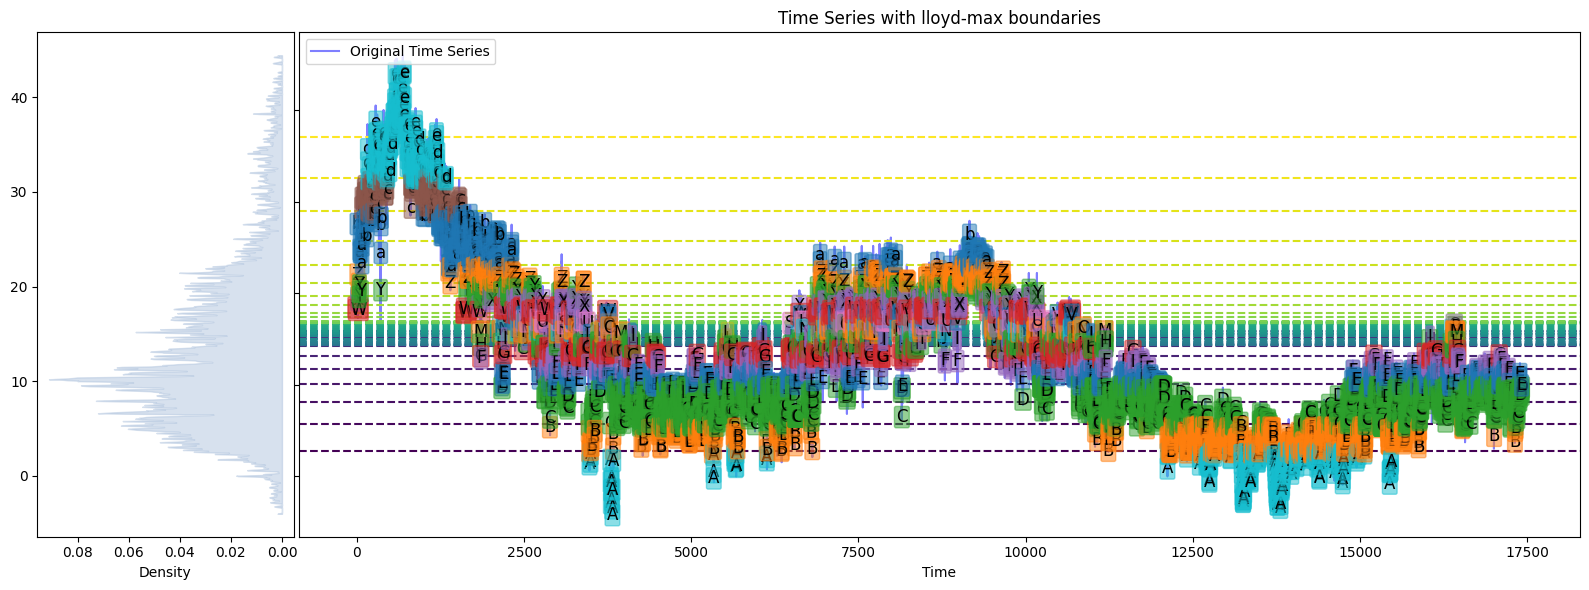

In [11]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=52, bandwidth=0.1, epochs=50, paa_window_size=4)
kernel_sax.fit(data.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="ETTh1_lloyd.png")
kernel_sax.save_alphabets(DATA_DIR+"ETTh1_lloyd.txt")
kernel_sax.text_to_df(start_datetime=str(data.index[0]), csv_path=DATA_DIR+"ETTh1_lloyd.csv")

### Kernel SAX for trend

/Users/dhanunjayelluri/Desktop/Data_Science_2021/Thesis/master-thesis/src/tqts/quantizer/lloyd_max.py:125: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  numerator = integrate.quad(
/Users/dhanunjayelluri/Desktop/Data_Science_2021/Thesis/master-thesis/src/tqts/quantizer/lloyd_max.py:128: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) o

Epoch 1, Boundaries delta: 18.1787055346, Codewords delta: 6.6776261180
Epoch 2, Boundaries delta: 2.6635075133, Codewords delta: 1.6824440418
Epoch 3, Boundaries delta: 1.1793372065, Codewords delta: 0.9739015889
Epoch 4, Boundaries delta: 0.7811881705, Codewords delta: 0.6196657470


/Users/dhanunjayelluri/Desktop/Data_Science_2021/Thesis/master-thesis/src/tqts/quantizer/lloyd_max.py:125: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  numerator = integrate.quad(


Epoch 5, Boundaries delta: 0.5342005589, Codewords delta: 0.4458875944
Epoch 6, Boundaries delta: 0.3972786792, Codewords delta: 0.3653235938
Epoch 7, Boundaries delta: 0.3340917939, Codewords delta: 0.3083458442
Epoch 8, Boundaries delta: 0.2838610552, Codewords delta: 0.2774257680


/Users/dhanunjayelluri/Desktop/Data_Science_2021/Thesis/master-thesis/src/tqts/quantizer/lloyd_max.py:128: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  denominator = integrate.quad(self.density_func, bi, bi_plus_1)[0]


Epoch 9, Boundaries delta: 0.2559439813, Codewords delta: 0.2395999934
Epoch 10, Boundaries delta: 0.2241181437, Codewords delta: 0.2060530157
Epoch 11, Boundaries delta: 0.1914342061, Codewords delta: 0.1727341725
Epoch 12, Boundaries delta: 0.1603684484, Codewords delta: 0.1516014363
Epoch 13, Boundaries delta: 0.1429457815, Codewords delta: 0.1356907773
Epoch 14, Boundaries delta: 0.1292113560, Codewords delta: 0.1226555808
Epoch 15, Boundaries delta: 0.1165437897, Codewords delta: 0.1141924209
Epoch 16, Boundaries delta: 0.1072052416, Codewords delta: 0.1064916580
Epoch 17, Boundaries delta: 0.0996016182, Codewords delta: 0.1001915517
Epoch 18, Boundaries delta: 0.0941600887, Codewords delta: 0.0833390537
Epoch 19, Boundaries delta: 0.0793361089, Codewords delta: 0.0719292381
Epoch 20, Boundaries delta: 0.0695254621, Codewords delta: 0.0663481932
Epoch 21, Boundaries delta: 0.0638875516, Codewords delta: 0.0601542183
Epoch 22, Boundaries delta: 0.0580660582, Codewords delta: 0.0579

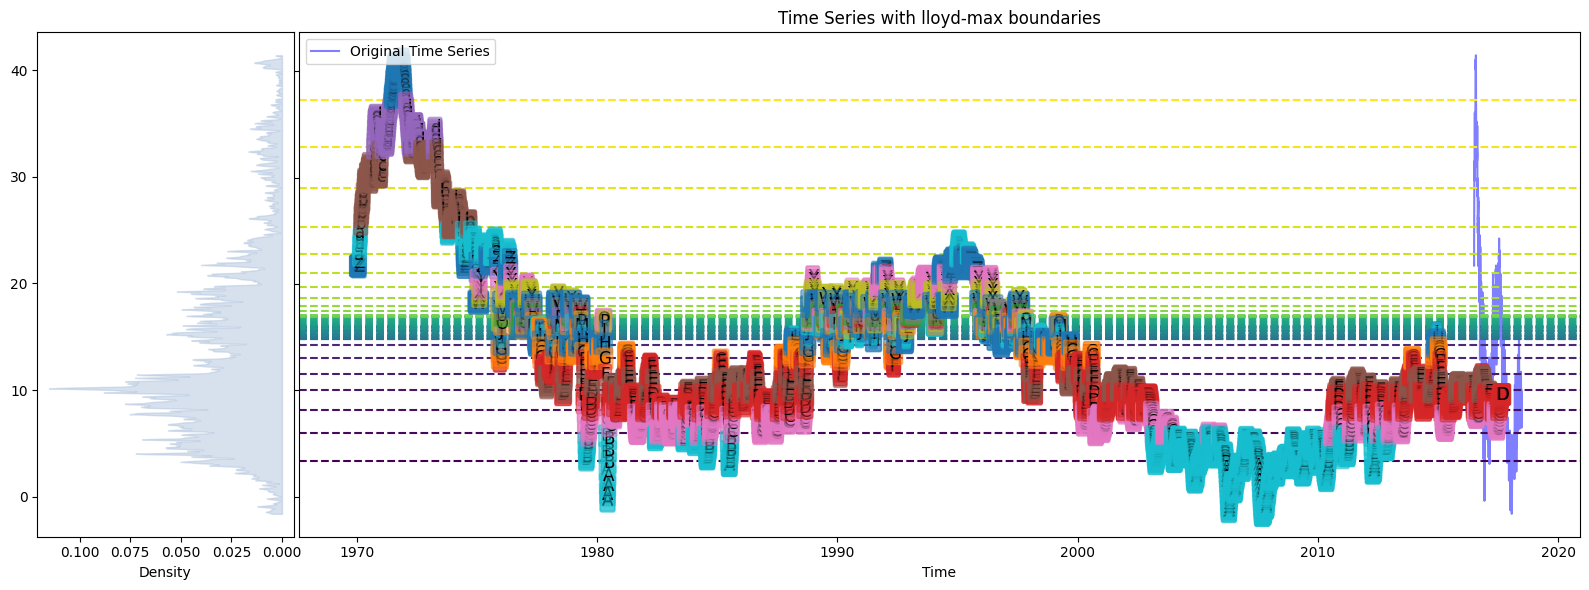

In [28]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=52, bandwidth=0.1, epochs=50, paa_window_size=4)
kernel_sax.fit(trend, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="ETTh1_lloyd_trend.png")
kernel_sax.save_alphabets(DATA_DIR+"ETTh1_lloyd_trend.txt")
kernel_sax.text_to_df(start_datetime=str(trend.index[0]), csv_path=DATA_DIR+"ETTh1_lloyd_trend.csv")

### Kernel SAX for seasonal

/Users/dhanunjayelluri/Desktop/Data_Science_2021/Thesis/master-thesis/src/tqts/quantizer/lloyd_max.py:128: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  denominator = integrate.quad(self.density_func, bi, bi_plus_1)[0]


Epoch 1, Boundaries delta: 0.0199784503, Codewords delta: 0.0188102865
Epoch 2, Boundaries delta: 0.0073855227, Codewords delta: 0.0047773478
Epoch 3, Boundaries delta: 0.0033423417, Codewords delta: 0.0027746437
Epoch 4, Boundaries delta: 0.0022290589, Codewords delta: 0.0019251779
Epoch 5, Boundaries delta: 0.0016361576, Codewords delta: 0.0014539697
Epoch 6, Boundaries delta: 0.0012851791, Codewords delta: 0.0011775963
Epoch 7, Boundaries delta: 0.0010663984, Codewords delta: 0.0009885494
Epoch 8, Boundaries delta: 0.0009056157, Codewords delta: 0.0008406790
Epoch 9, Boundaries delta: 0.0007839974, Codewords delta: 0.0007251211
Epoch 10, Boundaries delta: 0.0006828409, Codewords delta: 0.0006309993
Epoch 11, Boundaries delta: 0.0005978913, Codewords delta: 0.0005524237
Epoch 12, Boundaries delta: 0.0005281561, Codewords delta: 0.0004906912
Epoch 13, Boundaries delta: 0.0004698427, Codewords delta: 0.0004405778
Epoch 14, Boundaries delta: 0.0004194221, Codewords delta: 0.0003966135
E

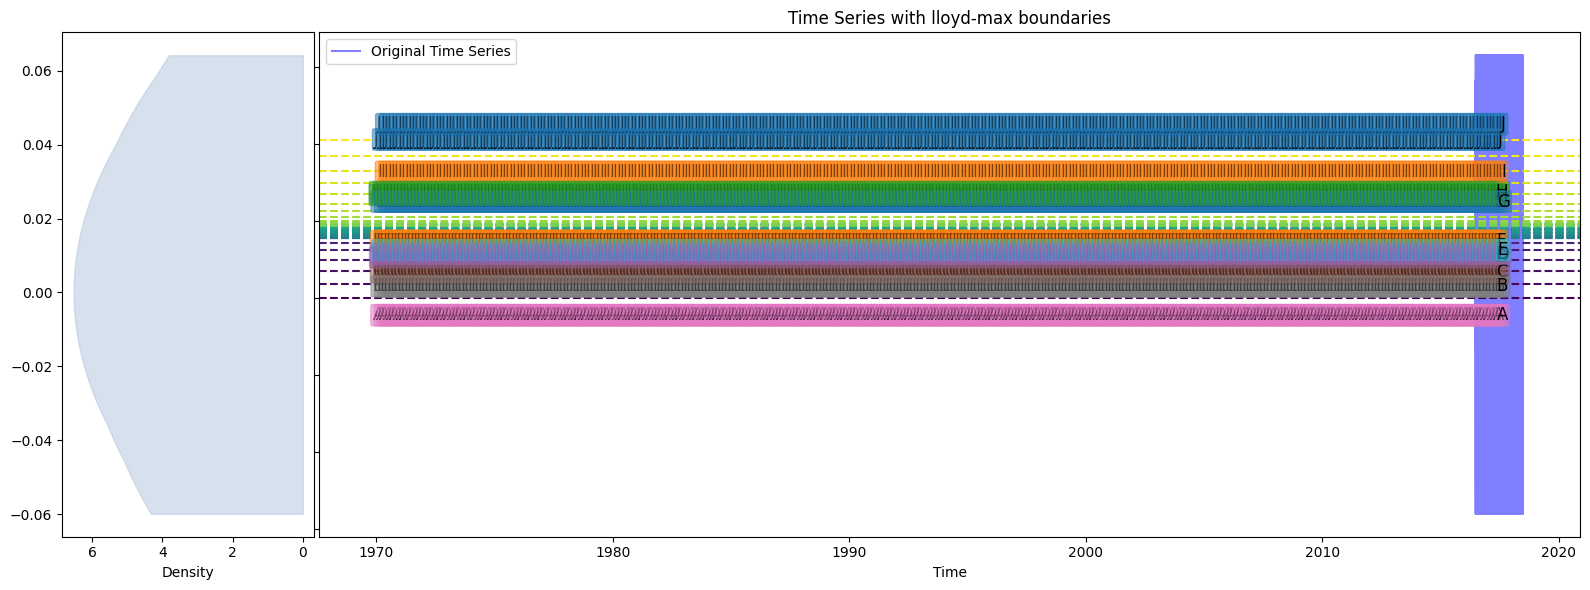

In [29]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=52, bandwidth=0.1, epochs=50, paa_window_size=4)
kernel_sax.fit(seasonal, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="ETTh1_lloyd_seasonal.png")
kernel_sax.save_alphabets(DATA_DIR+"ETTh1_lloyd_seasonal.txt")
kernel_sax.text_to_df(start_datetime=str(seasonal.index[0]), csv_path=DATA_DIR+"ETTh1_lloyd_seasonal.csv")

In [ ]:
kernel_sax

In [ ]:
new_data = pd.read_csv(DATA_DIR+"ETTh1_lloyd.csv", index_col='timestamp')

In [ ]:
new_data['encoded_alphabets'][:500].plot()

In [ ]:
def load_text_data(file_path: str) -> str:
    """
    Load character level text data from a file.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        text_data = file.read()
    return text_data

In [ ]:
def split_text_data(text_data: str, train_ratio: float=0.8) -> tuple:
    """
    Split text data into train and test datasets sequentially.
    
    :param text_data: The complete character-level text data.
    :param train_ratio: Ratio of data to be used for training (default is 0.8).
    :return: train_data, test_data
    """
    # Calculate the split index
    split_index = int(len(text_data) * train_ratio)
    
    # Split the data
    train_data = text_data[:split_index]
    test_data = text_data[split_index:]
    
    return train_data, test_data

In [ ]:
ETTh1_text_data = load_text_data(DATA_DIR + 'ETTh1_lloyd.txt')

In [ ]:
ETTh1_text_data[:100]

In [ ]:
ETTh1_train, ETTh1_test = split_text_data(ETTh1_text_data)
print(f"Train text len: {len(ETTh1_train)}, test text len: {len(ETTh1_test)}")

In [ ]:
def calculate_vocab_size(text_data):
    """
    Calculate the vocabulary size from the text data.
    """
    return len(set(text_data))

def suggest_sequence_length(text_data, num_samples=1000):
    """
    Suggest a sequence length based on the average length of sentences/phrases in the text data.
    """
    # Split the text into sentences or phrases
    sentences = text_data.split('\n')  # Assuming each line is a sentence/phrase
    sample_sentences = sentences[:num_samples]  # Sample a subset for analysis

    # Calculate average length
    avg_length = sum(len(sentence) for sentence in sample_sentences) / len(sample_sentences)
    return int(avg_length)

# Usage with the training data
vocab_size = calculate_vocab_size(ETTh1_train)
suggested_seq_len = suggest_sequence_length(ETTh1_train)

print(vocab_size, suggested_seq_len)


In [ ]:
def save_data_to_file(data: list, file_path: str) -> None:
    """
    Save the given data to a text file.

    Args:
        data (str): The text data to be saved.
        file_path (str): Path of the file where the data will be saved.
    """
    with open(file_path, 'w', encoding='utf-8') as file:
        file.write(data)
    print(f"Saved data to {file_path}")

# Usage
train_file_path = DATA_DIR +  'ETTh1_train.txt'  
test_file_path = DATA_DIR + 'ETTh1_test.txt'   

# Saving the data
save_data_to_file(ETTh1_train, train_file_path)
save_data_to_file(ETTh1_test, test_file_path)

In [ ]:
char_to_idx = {char: idx for idx, char in enumerate(sorted(set(ETTh1_text_data)))}

# Convert all characters in the data to their corresponding index
indexed_data = [char_to_idx[char] for char in ETTh1_text_data]

# Creating a DataFrame for plotting
df = pd.DataFrame(indexed_data, columns=['Character Index'])

# Plotting the data
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Character Index'], label='Character Index')
plt.title('Character Index Time Series')
plt.xlabel('Time Step')
plt.ylabel('Character Index')
plt.legend()
plt.show()